In [40]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [2]:
sns.set_style('whitegrid')

In [3]:
# warning 숨기기
import warnings
warnings.filterwarnings('ignore')

# 한글 폰트 문제 해결
import platform
from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print("Unknown System")

In [98]:
df = pd.read_csv("../Data/seoul_3.csv")
df.head()

,시군구,년도,전출인구,출생아수,산부인과의원수,cluster_id,pred_cluster
0,종로구,2013,30007,873,9,1.0,[0.96577095]
1,종로구,2014,27484,905,9,1.0,[0.99955393]
2,종로구,2015,27470,906,9,1.0,[0.99973912]
3,종로구,2016,26386,846,9,1.0,[1.01445749]
4,종로구,2017,25814,689,9,1.0,[1.02257004]


----
## 표준화 작업

In [99]:
# 최대값과 최소값 가져오기
min_max_scaler = preprocessing.MinMaxScaler()

col = df.columns[[2,3,4]]
x = df[col].values
x_scaled = min_max_scaler.fit_transform(x.astype(float))
x_scaled

array([[1.09433107e-01, 6.30367257e-02, 6.00000000e-02],
       [8.34423578e-02, 6.88836105e-02, 6.00000000e-02],
       [8.32981365e-02, 6.90663256e-02, 6.00000000e-02],
       [7.21312826e-02, 5.81034168e-02, 6.00000000e-02],
       [6.62388100e-02, 2.94171387e-02, 6.00000000e-02],
       [5.57724599e-02, 2.11949571e-02, 6.00000000e-02],
       [4.69852585e-02, 2.64936963e-02, 4.00000000e-02],
       [6.04699556e-02, 1.82715147e-04, 6.00000000e-02],
       [5.19608954e-02, 0.00000000e+00, 1.00000000e-01],
       [3.21819661e-02, 9.02612827e-02, 4.00000000e-02],
       [3.69618741e-02, 9.37328705e-02, 4.00000000e-02],
       [3.67352405e-02, 7.71057921e-02, 6.00000000e-02],
       [2.33947648e-02, 7.87502284e-02, 4.00000000e-02],
       [1.22588155e-02, 5.11602412e-02, 6.00000000e-02],
       [1.53389717e-02, 3.74566052e-02, 8.00000000e-02],
       [0.00000000e+00, 4.65923625e-02, 8.00000000e-02],
       [2.41982838e-02, 2.95998538e-02, 6.00000000e-02],
       [1.79452577e-02, 1.80887

In [100]:
# 정규화된 데이터프레임 생성
df_norm = pd.DataFrame(x_scaled, columns=col, index=df.index)
# df_2020_norm['시도'] = df['시도']
df_norm.head()

,전출인구,출생아수,산부인과의원수
0,0.109433,0.063037,0.06
1,0.083442,0.068884,0.06
2,0.083298,0.069066,0.06
3,0.072131,0.058103,0.06
4,0.066239,0.029417,0.06


In [101]:
df_norm['cluster_id'] = df['cluster_id']
df_norm.head()

,전출인구,출생아수,산부인과의원수,cluster_id
0,0.109433,0.063037,0.06,1.0
1,0.083442,0.068884,0.06,1.0
2,0.083298,0.069066,0.06,1.0
3,0.072131,0.058103,0.06,1.0
4,0.066239,0.029417,0.06,1.0


In [102]:
df_feature = df_norm.iloc[:,:3]
df_feature.head()

,전출인구,출생아수,산부인과의원수
0,0.109433,0.063037,0.06
1,0.083442,0.068884,0.06
2,0.083298,0.069066,0.06
3,0.072131,0.058103,0.06
4,0.066239,0.029417,0.06


---
## 주성분 분석

In [103]:
df_feature.shape

(225, 3)

In [104]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3) # 225개의 데이터중 구별이 확실한 주성분 3개를 선택
pca.fit(df_feature)

PCA(n_components=3)

In [105]:
pca.components_.shape # sample 3개만 들어가있다

(3, 3)

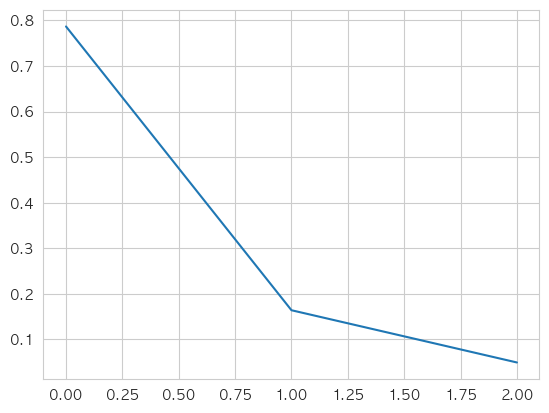

In [106]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

> ### 1 선정

In [107]:
print(pca.explained_variance_ratio_)
print('sum:', sum(pca.explained_variance_ratio_))

[0.78681678 0.16393112 0.0492521 ]
sum: 1.0


In [108]:
pca = PCA(n_components=1)
pca.fit(df_feature)

PCA(n_components=1)

In [109]:
pca.components_.shape # sample 50개만 들어가있다 # 50개가 뭔지 그래프로 그려보자

(1, 3)

In [110]:
# 행의 갯수는 원본과 동일하게 하고 Feature의 특성을 1개의 주성분으로 변경하기
print(df_feature.shape)
km_pca = pca.transform(df_feature)
print(km_pca.shape)
km_pca

(225, 3)
(225, 1)


array([[-0.48977152],
       [-0.50427843],
       [-0.50427047],
       [-0.518435  ],
       [-0.53938954],
       [-0.55145707],
       [-0.56281189],
       [-0.56058135],
       [-0.5497539 ],
       [-0.5354997 ],
       [-0.53015537],
       [-0.53169336],
       [-0.54834355],
       [-0.56386822],
       [-0.56140183],
       [-0.56661702],
       [-0.56831405],
       [-0.57940787],
       [-0.30309204],
       [-0.31234786],
       [-0.29974551],
       [-0.34713589],
       [-0.39596177],
       [-0.3885257 ],
       [-0.41043985],
       [-0.40172032],
       [-0.38290096],
       [-0.1382046 ],
       [-0.13799333],
       [-0.14340919],
       [-0.19907131],
       [-0.21328609],
       [-0.19614961],
       [-0.210888  ],
       [-0.20181819],
       [-0.26381089],
       [ 0.00596118],
       [ 0.0253675 ],
       [ 0.01700084],
       [-0.02750225],
       [-0.09969917],
       [-0.10070028],
       [-0.14691198],
       [-0.16690377],
       [-0.20859321],
       [-0

In [111]:
km_pca.tolist()

[[-0.4897715151702711],
 [-0.504278429525044],
 [-0.504270474930671],
 [-0.5184350044171072],
 [-0.5393895374242186],
 [-0.5514570678687156],
 [-0.5628118896376092],
 [-0.560581352933119],
 [-0.5497538994552289],
 [-0.5354996975116648],
 [-0.5301553713975997],
 [-0.5316933620345765],
 [-0.548343552853596],
 [-0.5638682240447837],
 [-0.5614018344492816],
 [-0.5666170170316701],
 [-0.5683140471242671],
 [-0.5794078689731007],
 [-0.3030920385717829],
 [-0.3123478632474192],
 [-0.29974551412584893],
 [-0.3471358899140235],
 [-0.3959617720148015],
 [-0.38852569996199576],
 [-0.4104398508474202],
 [-0.4017203238120373],
 [-0.38290096499356174],
 [-0.13820459500463883],
 [-0.13799332898823222],
 [-0.143409194901338],
 [-0.19907130639478354],
 [-0.21328608535870855],
 [-0.1961496121672522],
 [-0.21088799664769473],
 [-0.20181819306545007],
 [-0.26381088679055653],
 [0.005961177304970325],
 [0.025367495714392944],
 [0.017000841418503474],
 [-0.02750224554464265],
 [-0.09969916778162076],
 [-0.1

In [112]:
df

,시군구,년도,전출인구,출생아수,산부인과의원수,cluster_id,pred_cluster
0,종로구,2013,30007,873,9,1.00,[0.96577095]
1,종로구,2014,27484,905,9,1.00,[0.99955393]
2,종로구,2015,27470,906,9,1.00,[0.99973912]
3,종로구,2016,26386,846,9,1.00,[1.01445749]
4,종로구,2017,25814,689,9,1.00,[1.02257004]
...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,0.00,[0.14901874]
221,강동구,2018,68933,2659,17,0.33,[0.44308806]
222,강동구,2019,67292,2437,17,0.33,[0.46573141]
223,강동구,2020,78271,2535,17,0.33,[0.31806754]


In [113]:
df['principal_col'] = km_pca
df

,시군구,년도,전출인구,출생아수,산부인과의원수,cluster_id,pred_cluster,principal_col
0,종로구,2013,30007,873,9,1.00,[0.96577095],-0.489772
1,종로구,2014,27484,905,9,1.00,[0.99955393],-0.504278
2,종로구,2015,27470,906,9,1.00,[0.99973912],-0.504270
3,종로구,2016,26386,846,9,1.00,[1.01445749],-0.518435
4,종로구,2017,25814,689,9,1.00,[1.02257004],-0.539390
...,...,...,...,...,...,...,...,...
220,강동구,2017,90819,2968,18,0.00,[0.14901874],0.243810
221,강동구,2018,68933,2659,17,0.33,[0.44308806],0.046475
222,강동구,2019,67292,2437,17,0.33,[0.46573141],0.010925
223,강동구,2020,78271,2535,17,0.33,[0.31806754],0.099569


In [114]:
df_km_norm_pca = df[['시군구', '년도', 'principal_col', 'cluster_id']]
df_km_norm_pca

,시군구,년도,principal_col,cluster_id
0,종로구,2013,-0.489772,1.00
1,종로구,2014,-0.504278,1.00
2,종로구,2015,-0.504270,1.00
3,종로구,2016,-0.518435,1.00
4,종로구,2017,-0.539390,1.00
...,...,...,...,...
220,강동구,2017,0.243810,0.00
221,강동구,2018,0.046475,0.33
222,강동구,2019,0.010925,0.33
223,강동구,2020,0.099569,0.33


In [115]:
(df_km_norm_pca['principal_col'])
np.round(np.min(df_km_norm_pca['principal_col']),2)

-0.58

In [116]:
print('최소값:', round(np.min(df_km_norm_pca['principal_col']), 2), '최대값:', round(np.max(df_km_norm_pca['principal_col']), 2))

최소값: -0.58 최대값: 0.87


In [117]:
df_km_norm_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구            225 non-null    object 
 1   년도             225 non-null    int64  
 2   principal_col  225 non-null    float64
 3   cluster_id     225 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 7.2+ KB


----
## Feature, Target

In [118]:
# Feature, Target
data = df_km_norm_pca[['principal_col']].to_numpy()
target = df_km_norm_pca['cluster_id'].to_numpy()

----
### 검증 세트 추가
- 훈련(60%), 검증(20%), 테스트(20%)

In [119]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = \
    train_test_split(data, target, test_size=0.2) # random_state=42,  stratify=target

In [120]:
sub_input, val_input, sub_target, val_target = \
    train_test_split(train_input, train_target, test_size=0.2) # random_state=42, stratify=train_target

In [121]:
# 세트 별 크기
print("Train :", sub_input.shape)
print("Valid :", val_input.shape)
print("Test  :", test_input.shape)

Train : (144, 1)
Valid : (36, 1)
Test  : (45, 1)


### Linear Regression

In [122]:
# LinearRegression
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(sub_input, sub_target)

print("Train score :", lr.score(sub_input, sub_target))
print("Valid score :", lr.score(val_input, val_target))
print("Test score :", lr.score(test_input, test_target))

Train score : 0.8513012679370386
Valid score : 0.7816722769558764
Test score : 0.797882006331905


In [138]:
pred_cluster

[array([0.98843359]),
 array([1.00241337]),
 array([1.0024057]),
 array([1.01605554]),
 array([1.03624865]),
 array([1.04787768]),
 array([1.0588199]),
 array([1.05667042]),
 array([1.0462364]),
 array([1.03250015]),
 array([1.02735002]),
 array([1.02883213]),
 array([1.0448773]),
 array([1.05983785]),
 array([1.05746108]),
 array([1.06248676]),
 array([1.06412213]),
 array([1.07481283]),
 array([0.80853748]),
 array([0.81745697]),
 array([0.80531255]),
 array([0.85098091]),
 array([0.89803261]),
 array([0.89086674]),
 array([0.9119846]),
 array([0.90358191]),
 array([0.88544639]),
 array([0.64964154]),
 array([0.64943795]),
 array([0.65465702]),
 array([0.70829654]),
 array([0.7219948]),
 array([0.70548101]),
 array([0.71968385]),
 array([0.71094361]),
 array([0.77068368]),
 array([0.51071431]),
 array([0.49201316]),
 array([0.5000758]),
 array([0.54296178]),
 array([0.61253528]),
 array([0.61350002]),
 array([0.65803252]),
 array([0.67729787]),
 array([0.71747245]),
 array([0.5767876

In [142]:
lr.predict([[df_km_norm_pca.iloc[1,2]]]).tolist()

[1.0024133682927006]

In [148]:
pred_cluster = []

for i in range(len(df_km_norm_pca)):
    # pred_cluster.append(lr.predict([[df.iloc[i,2], df.iloc[i,3], df.iloc[i,4], df.iloc[i,5], df.iloc[i,6], df.iloc[i,7], df.iloc[i,8], df.iloc[i,9]]]))
    # pred_cluster.append(lr.predict([[df_km_norm_pca.iloc[i,2], df_km_norm_pca.iloc[i,3], df_km_norm_pca.iloc[i,4]]]))
    pred_cluster.append(lr.predict([[df_km_norm_pca.iloc[i,2]]]))

df_km_norm_pca['pred_cluster'] = pred_cluster
df_km_norm_pca

,시군구,년도,principal_col,cluster_id,pred_cluster
0,종로구,2013,-0.489772,1.00,[0.9884335909396609]
1,종로구,2014,-0.504278,1.00,[1.0024133682927006]
2,종로구,2015,-0.504270,1.00,[1.0024057027440147]
3,종로구,2016,-0.518435,1.00,[1.0160555364500914]
4,종로구,2017,-0.539390,1.00,[1.0362486456676945]
...,...,...,...,...,...
220,강동구,2017,0.243810,0.00,[0.2815083892127137]
221,강동구,2018,0.046475,0.33,[0.47167243678083237]
222,강동구,2019,0.010925,0.33,[0.5059307576263042]
223,강동구,2020,0.099569,0.33,[0.4205077747102518]


In [151]:
df_km_norm_pca['pred_cluster'] = df_km_norm_pca['pred_cluster'].astype(float)
df_km_norm_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   시군구            225 non-null    object 
 1   년도             225 non-null    int64  
 2   principal_col  225 non-null    float64
 3   cluster_id     225 non-null    float64
 4   pred_cluster   225 non-null    float64
dtypes: float64(3), int64(1), object(1)
memory usage: 8.9+ KB


### Save File

In [123]:
df_km_norm_pca.to_csv("../Data/seoul_km_norm_pca.csv", index=False)

### Save Model

In [124]:
# 모델 저장하기
import joblib
filename = "../Data/lr_seoul_3.h5"
joblib.dump(lr, filename)

['../Data/lr_seoul_3.h5']

In [125]:
print(lr.coef_, lr.intercept_)

[-0.96366305] 0.5164588781580495


In [135]:
df_km_norm_pca.head()

,시군구,년도,principal_col,cluster_id,pred_cluster
0,종로구,2013,-0.489772,1.0,[0.9884335909396609]
1,종로구,2014,-0.504278,1.0,[1.0024133682927006]
2,종로구,2015,-0.504270,1.0,[1.0024057027440147]
3,종로구,2016,-0.518435,1.0,[1.0160555364500914]
4,종로구,2017,-0.539390,1.0,[1.0362486456676945]


In [130]:
print('최소값:', round(np.min(df_km_norm_pca['principal_col']), 2), '최대값:', round(np.max(df_km_norm_pca['principal_col']), 2))

최소값: -0.58 최대값: 0.87


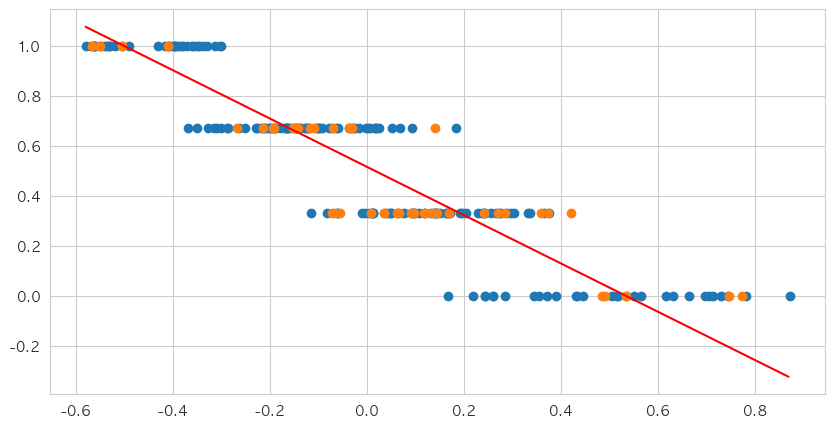

In [131]:
# 구간별 직선을 그리기 위해 15에서 49까지의 정수 배열을 만든다.
# point = np.arange(-0.5, 2)

# 훈련세트의 산점도
plt.figure(figsize=(10,5))
plt.scatter(train_input, train_target)
plt.scatter(test_input, test_target)

# 15에서 50까지 1차 방정식 그래프
# plt.plot(point, -4.66*point + 0.80, c='red')
plt.plot([-0.58, 0.87], [(-0.58)*lr.coef_+lr.intercept_, (0.87)*lr.coef_+lr.intercept_], c='red')

# 50cm 생선최소값: -0.45 최대값: -0.45
# plt.scatter(50, 1241.8, marker='^')

plt.show()

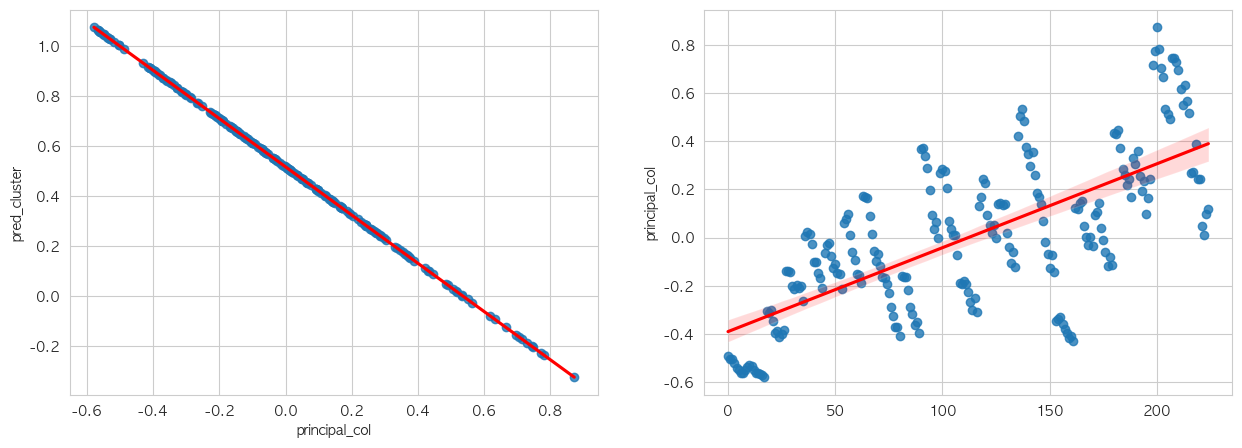

In [153]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형회귀선 표시 cf.regression
sns.regplot(
    x = 'principal_col',
    y = 'pred_cluster',
    data=df_km_norm_pca,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    ax=ax1,
    fit_reg=True
)

sns.regplot(
    x = df_km_norm_pca.index,
    y = 'principal_col',
    data=df_km_norm_pca,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    ax=ax2,
    fit_reg=True
)
plt.show()

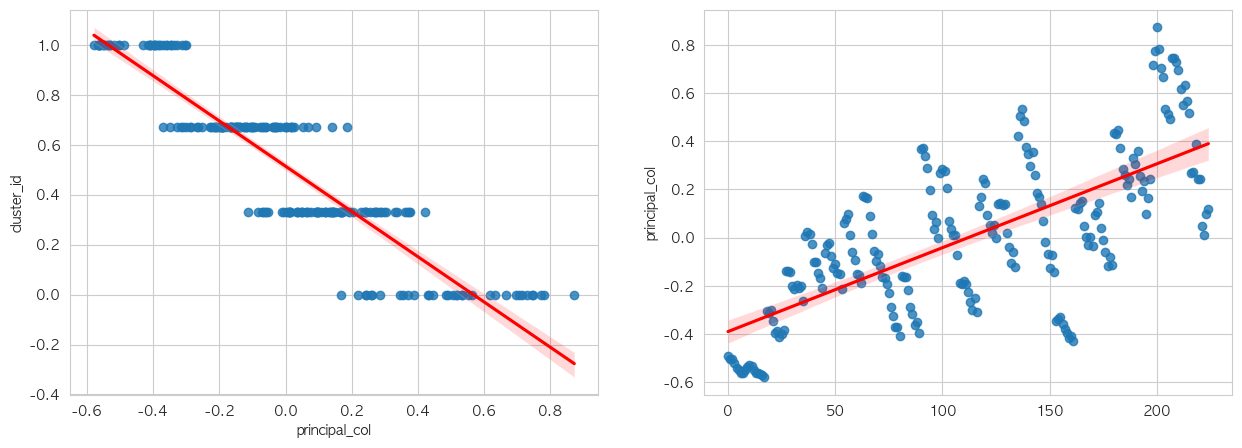

In [154]:
fig = plt.figure(figsize=(15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

# 선형회귀선 표시 cf.regression
sns.regplot(
    x = 'principal_col',
    y = 'cluster_id',
    data=df_km_norm_pca,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    ax=ax1,
    fit_reg=True
)

sns.regplot(
    x = df_km_norm_pca.index,
    y = 'principal_col',
    data=df_km_norm_pca,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    ax=ax2,
    fit_reg=True
)
plt.show()

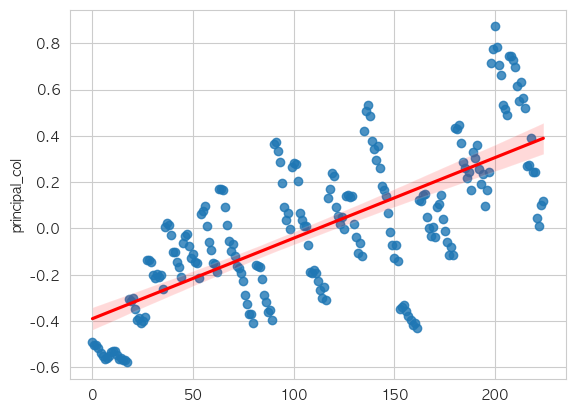

In [155]:
sns.regplot(
    x = df_km_norm_pca.index,
    y = 'principal_col',
    data=df_km_norm_pca,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    # ax=ax2,
    fit_reg=True
)
plt.show()

In [157]:
df_km_norm_pca

,시군구,년도,principal_col,cluster_id,pred_cluster
0,종로구,2013,-0.489772,1.00,0.988434
1,종로구,2014,-0.504278,1.00,1.002413
2,종로구,2015,-0.504270,1.00,1.002406
3,종로구,2016,-0.518435,1.00,1.016056
4,종로구,2017,-0.539390,1.00,1.036249
...,...,...,...,...,...
220,강동구,2017,0.243810,0.00,0.281508
221,강동구,2018,0.046475,0.33,0.471672
222,강동구,2019,0.010925,0.33,0.505931
223,강동구,2020,0.099569,0.33,0.420508


In [158]:
df_jonro = df_km_norm_pca[df_km_norm_pca['시군구']=='종로구']
df_jonro

,시군구,년도,principal_col,cluster_id,pred_cluster
0,종로구,2013,-0.489772,1.0,0.988434
1,종로구,2014,-0.504278,1.0,1.002413
2,종로구,2015,-0.504270,1.0,1.002406
3,종로구,2016,-0.518435,1.0,1.016056
4,종로구,2017,-0.539390,1.0,1.036249
5,종로구,2018,-0.551457,1.0,1.047878
6,종로구,2019,-0.562812,1.0,1.058820
7,종로구,2020,-0.560581,1.0,1.056670
8,종로구,2021,-0.549754,1.0,1.046236


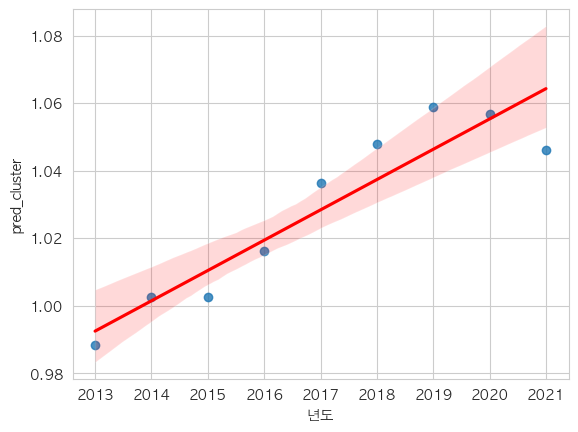

In [160]:
sns.regplot(
    # x = df_jonro.index,
    x = '년도',
    y = 'pred_cluster',
    data=df_jonro,
    # scatter_kws={'color' : 'black'}, # scatter color
    line_kws={'color' : 'red'}, # regression line color # 희미한 범위색은 표준오차(stdl)이다.
    # ax=ax2,
    fit_reg=True
)
plt.show()